# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

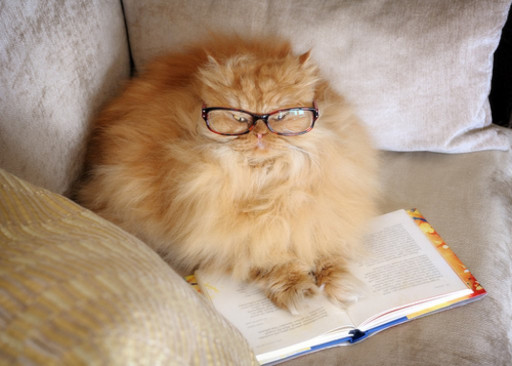

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [315]:
cat_df = pd.read_csv('./cat_exam_data.csv')
cat_df.head(5)

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [230]:
cat_df.isna().any()
#true в test_score -> есть NaN

school                False
test_score             True
number_of_students    False
dtype: bool

In [231]:
cat_df = cat_df.dropna(how='any')
cat_df.isna().any()

school                False
test_score            False
number_of_students    False
dtype: bool

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [232]:
cat_df.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

Во-первых, информация mean(school) не имеет никакого физического смысла, имеет смысл среднее количество учеников в школе и средний балл на экзамене.

Посчитайте сколько котиков получили 100 баллов.

In [234]:
col_mask = 'test_score'
row_mask = cat_df.loc[:,'test_score'] >= 100
cat_df.loc[row_mask, col_mask].count()

51

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [235]:
row_mask = cat_df.loc[:,'test_score'] >= 100
df100 = cat_df.loc[row_mask]
df100
#Вся подробная информация о школах, где есть стобальник

,school,test_score,number_of_students
21895,283,100.0,823
36760,233,100.0,1140
43217,302,100.0,1517
49028,394,100.0,1079
53181,114,100.0,1231
55143,105,100.0,1164
56951,91,100.0,749
58262,14,100.0,777
75956,184,100.0,742
81871,328,100.0,789


In [236]:
df100 = df100.groupby(by=['school', 'number_of_students']).count().rename(columns={'test_score':'count'})

df100 = df100.sort_values(by='count', ascending=False)
#Сортируем школы в обратном порядке по количеству стобальников.
df100

,,count
school,number_of_students,
486,800,2
4,1015,1
395,436,1
302,1517,1
303,701,1
315,580,1
328,789,1
342,920,1
346,913,1


Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [238]:
df_mean = cat_df.groupby(by = ['school', 'number_of_students'], as_index=False).mean()
df_mean = df_mean.rename(columns = {'test_score': 'mean_score'})
df_mean.head(20)

,school,number_of_students,mean_score
0,0,418,52.294258
1,1,1209,52.028950
2,2,1035,51.751451
3,3,1245,51.566265
4,4,1015,51.025641
5,5,988,51.394737
6,6,914,52.063527
7,7,1265,51.670356
8,8,1036,51.543436
9,9,766,52.260471


Отсортируйте школы по среднему результату.

In [239]:
df_mean = df_mean.sort_values(by='mean_score', ascending=False)

Посмотрите на топ 10 лучших результатов.

In [240]:
df_mean.head(10)

,school,number_of_students,mean_score
57,57,560,53.341682
124,124,598,52.993311
263,263,669,52.982063
82,82,555,52.981982
366,366,773,52.970207
465,465,1179,52.957555
169,169,858,52.932401
449,449,357,52.910364
477,477,808,52.898515
464,464,431,52.865429


**Вывод:** Помня о том, что среднее количество учеников в школе примерно 1100, можно заметить, ч то в самых лучших школах учатся не так уж много учеников.

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [241]:
df_mean.tail(10)

,school,number_of_students,mean_score
383,383,636,50.716981
264,264,929,50.702906
48,48,649,50.690293
156,156,1093,50.641354
394,394,1079,50.461538
194,194,774,50.406977
471,471,960,50.362500
486,486,800,50.325000
211,211,351,50.248571
353,353,336,50.050595


**Вывод:** Оказывается, и в худших школах не так много учеников.

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

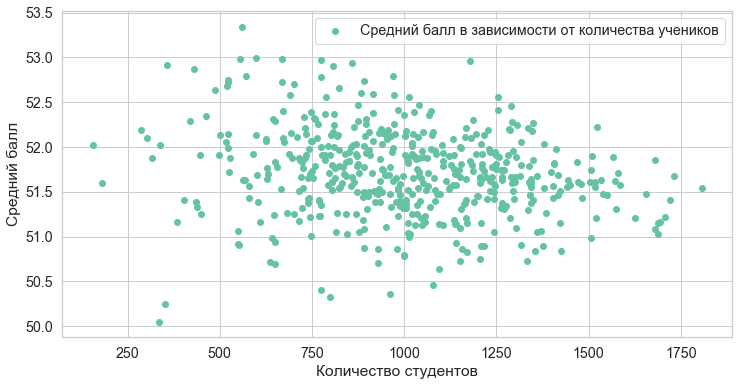

In [242]:
plt.figure(figsize = (12,6))

plt.scatter(df_mean.number_of_students,
         df_mean.mean_score,
         label = 'Средний балл в зависимости от количества учеников')
plt.xlabel('Количество студентов')
plt.ylabel('Средний балл')
plt.legend()
plt.show()

**Вывод:** Оказывается, количество учеников не говорит об успеваемости школы, но зато с другой стороны, чем больше учеников, тем балл меньше отклоняется от среднего.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [243]:
row_mask_big = cat_df.loc[:,'number_of_students'] > 1000
row_mask_small = cat_df.loc[:,'number_of_students'] <= 1000

col_mask = 'test_score'
cat_df_big = cat_df.loc[row_mask_big, col_mask]
cat_df_small = cat_df.loc[row_mask_small, col_mask]


Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

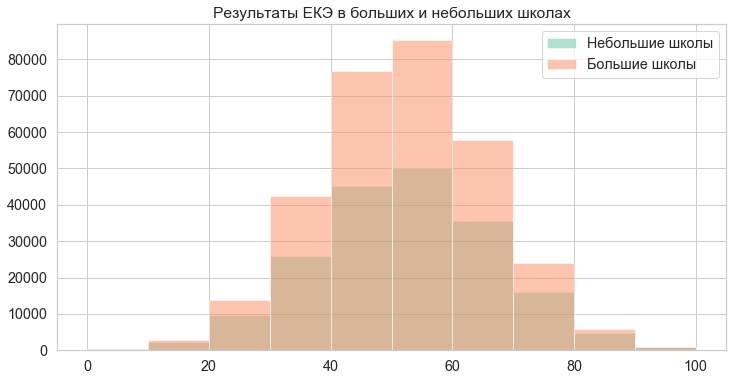

In [244]:
plt.figure(figsize = (12,6))

plt.hist(cat_df_small,
        bins = 10,
        alpha = 0.5,
        label = 'Небольшие школы')

plt.hist(cat_df_big,
        bins = 10,
        alpha = 0.5,
        label = 'Большие школы')

plt.title('Результаты ЕКЭ в больших и небольших школах')
plt.legend()
plt.show()

**Вывод:** В целом, большие школы имеют "средние" результаты.

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

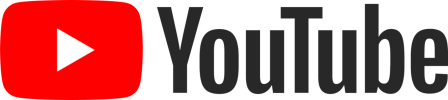


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [253]:
df_yt = pd.read_csv('RUvideos_short.csv', dayfirst=True)
df_yt['trending_date'] = pd.to_datetime(df_yt.trending_date, format='%y.%d.%m')
df_yt.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
5,SLF34Gt_UxQ,2017-11-14,АНОНС / Versus Fresh Blood 4: Война Стилей,versusbattleru,24,2017-11-12T17:50:31.000Z,[none],733936,47964,2545,3901,https://i.ytimg.com/vi/SLF34Gt_UxQ/default.jpg,False,False,False,Участвовать в проекте допускаются только лица ...
6,YVcroDDi24s,2017-11-14,ЗАМОРОЗКА ЧЕЛОВЕКА + 1 К БЕССМЕРТИЮ — ТОПЛЕС,ТОПЛЕС,28,2017-11-12T17:19:59.000Z,"топлес|""ян топлес""|""ян лапотков""|""caramba""|""to...",1131851,78692,2427,4114,https://i.ytimg.com/vi/YVcroDDi24s/default.jpg,False,False,False,"Факультет Капитаны России, мой курс ► http://k..."
7,TZdNwUSgRHc,2017-11-14,"РПЦ незаконно строит храм, полиция смотрит как...",Нет застройке без согласия,22,2017-11-13T06:29:09.000Z,[none],97006,2259,330,887,https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg,False,False,False,"Строители нападают на муниципального депутата,..."
8,YxEJVGfP74Y,2017-11-14,Итальянцы VS русская народная медицина,Итальянцы by Kuzno Productions,24,2017-11-13T17:22:55.000Z,"Итальянцы|""эмоциональные итальянцы""|""итальянцы...",105116,9780,93,1184,https://i.ytimg.com/vi/YxEJVGfP74Y/default.jpg,False,False,False,Внимание! Стрим с Алессандрой пройдет 23 ноябр...
9,oZYT_vC4-pc,2017-11-14,КВН 2017 Высшая лига Вторая 1/2 (12.11.2017) И...,Официальный канал КВН,23,2017-11-12T22:00:03.000Z,"KVN|""КВН""|""камеди""|""comedy""|""приколы""|""финал""|...",442228,3194,5985,3218,https://i.ytimg.com/vi/oZYT_vC4-pc/default.jpg,False,False,False,КВН 2017 Высшая лига Вторая 1/2 (12.11.2017) И...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [254]:
df_yt = df_yt.loc[:, ['trending_date', 
                      'category_id', 
                      'views', 
                      'likes', 
                      'dislikes',
                      'comment_count']]

for i, date in enumerate(df_yt.loc[:, 'trending_date']):
    df_yt.loc[i, 'trending_date'] = date.day
df_yt.head(20)

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692
5,14,24,733936,47964,2545,3901
6,14,28,1131851,78692,2427,4114
7,14,22,97006,2259,330,887
8,14,24,105116,9780,93,1184
9,14,23,442228,3194,5985,3218


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

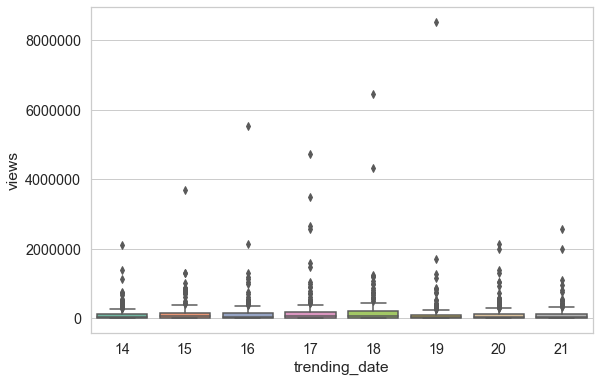

In [255]:
plt.figure(figsize=(9, 6))
sns.boxplot(x = 'trending_date', y = 'views', data=df_yt)
plt.show()

График получился нечитабельным.

Исправьте этот недостаток, установив некоторое значение. 

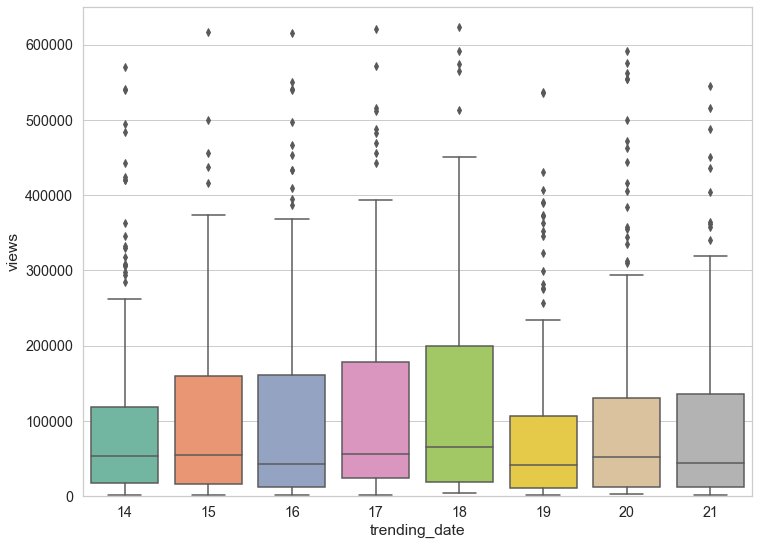

In [256]:
plt.figure(figsize=(12, 9))
sns.boxplot(x = 'trending_date', y = 'views', data=df_yt)
plt.ylim(0, 650000)
plt.show()

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

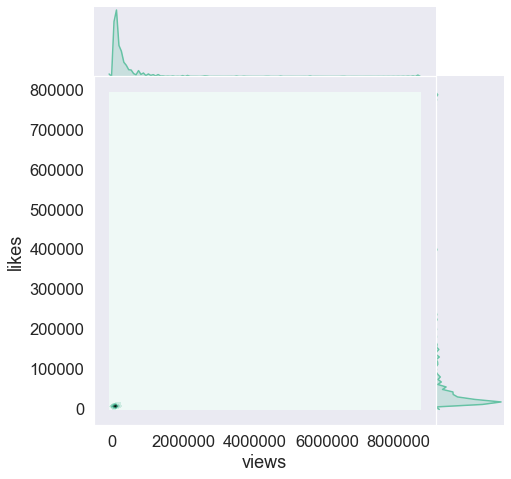

In [22]:
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("dark"):
    
    sns.jointplot(df_yt.views, df_yt.likes, kind='kde', height=7, space=0);

График неинформативен из-за масштабности.

Исправьте этот недостаток.

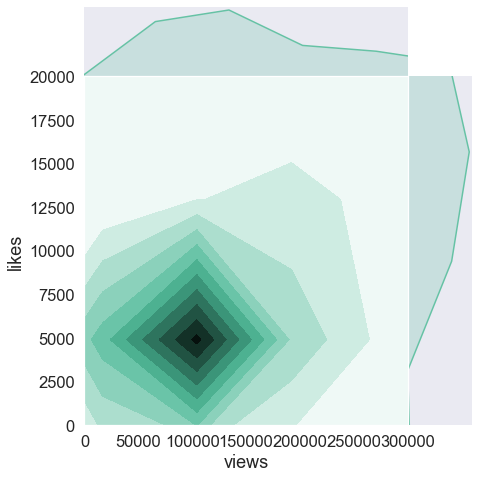

In [257]:
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("dark"):
    
    sns.jointplot(df_yt.views, df_yt.likes, kind='kde', height=7, space=0, xlim = (0, 300000), ylim = (0, 20000));


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


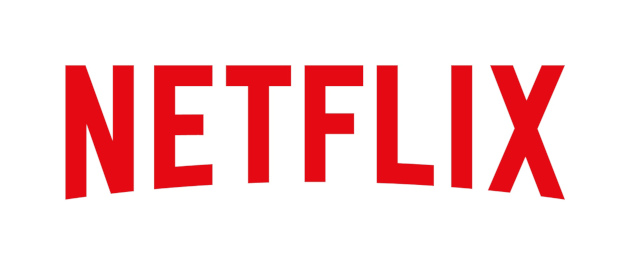

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [258]:
data = pd.read_csv('netflix_data.csv', encoding='cp437')

del data['ratingDescription'], data['user rating size']


Удалите из данных дупликаты. Сколько объектов удалено?

In [259]:
cnt_bf_delete = data.title.count()
print('Количество объектов до удаления', cnt_bf_delete)
data = data.drop_duplicates()
cnt_after_delete = data.title.count()
print('Количество объектов после удаления', cnt_after_delete)

Количество объектов до удаления 1000
Количество объектов после удаления 500


Сколько объектов осталось?

In [260]:
print('Значит, было удалено', cnt_bf_delete - cnt_after_delete, 'объектов')

Значит, было удалено 500 объектов


Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [261]:
data.isna().any()
#будет корректно заменить все пропуски на среднее по столбцу
data = data.fillna(value=data.mean())

Сколько рейтинговых групп представлено в данных?

In [262]:
data.rating.nunique()

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

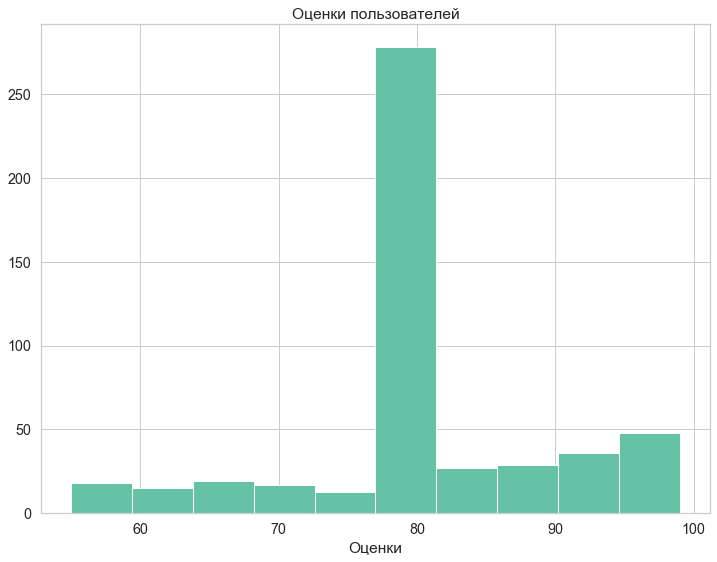

In [29]:
plt.figure(figsize = (12,9))

plt.hist(data['user rating score'],
        bins = 10)

plt.xlabel('Оценки')
plt.title('Оценки пользователей')
plt.show()

**Вывод:** В целом, пользователи ставят неплохие оценки.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [264]:
data['user rating score'].describe()

count    500.000000
mean      81.398438
std        9.100789
min       55.000000
25%       81.398438
50%       81.398438
75%       84.000000
max       99.000000
Name: user rating score, dtype: float64

**Ответ:** В данном случае они не отличаются, что очень для меня странно, поскольку это разные понятия. Но возможно, график очень симметричный, поэтому так получилось.

В какие годы были запущены шоу, представленные в датасете?

In [265]:
print('Шоу были запущены в ', data['release year'].min(),'-',data['release year'].max(), 'годах')

Шоу были запущены в  1940 - 2017 годах


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

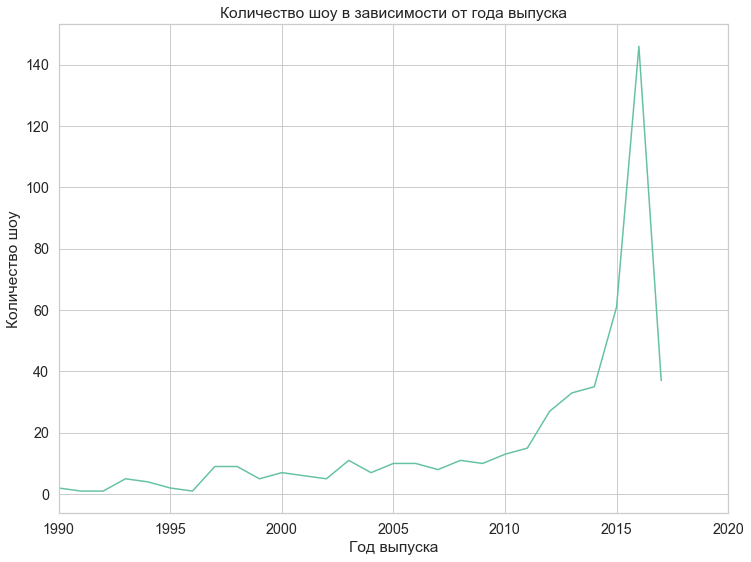

In [278]:
plt.figure(figsize = (12,9))

plt.plot(np.sort(data['release year'].unique()),
        data.groupby('release year').count().rename(columns = {'title':'count'}).loc[:,'count'])

plt.xlim(1990, 2020)
plt.xlabel('Год выпуска')
plt.ylabel('Количество шоу')
plt.title('Количество шоу в зависимости от года выпуска')
plt.show()

**Вывод:** На графике видно, что именно в десятых годах начали чаще всего запускать новое шоу. Однако на графике видно, что в 2017 году шоу было намного меньше, чем в 2016. Это странно, поскольку именно до 2016-2017 года количество монотонно растет.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [33]:
print('Средняя оценка пользователей в 2016:',
      data.loc[data['release year'] == 2016, 'user rating score'].mean())
print('Средняя оценка пользователей в 2017:',
      data.loc[data['release year'] == 2017, 'user rating score'].mean())    

Средняя оценка пользователей в 2016: 83.11579623287672
Средняя оценка пользователей в 2017: 84.30722128378379


**Вывод:** Нельзя сказать, что 2017 был "успешнее" для Netflix. Да, если брать только среднюю оценку, то да. Но не стоит игнорировать факт, что в 2017 вышло гораздо меньше шоу. Скорее всего, на практике важнее количество шоу, чем такой маленький скачок в среднем рейтинге.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

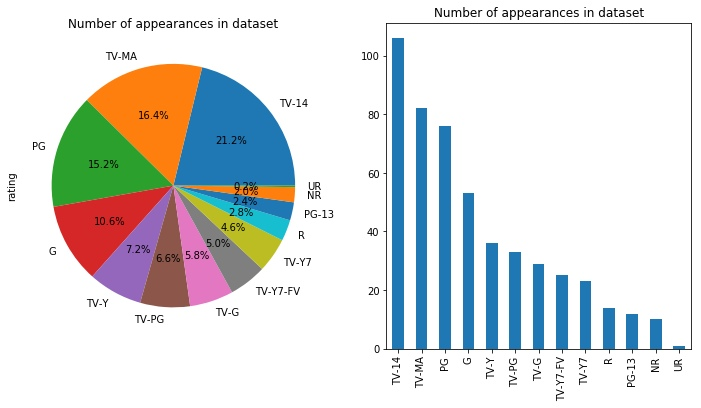

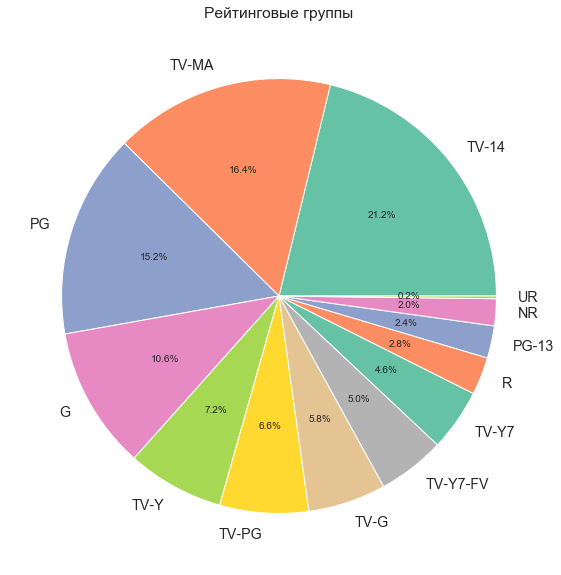

In [34]:
fig = plt.figure(figsize = (10, 10))

plt.pie(data['rating'].value_counts(),
       labels=data['rating'].value_counts().index,
       autopct='%1.1f%%')
plt.title('Рейтинговые группы')
plt.show()

**Вывод:** Отвечая на вопрос выше, легче воспринимать первый тип графика. Из графика видно, что в рейтинговой категории преобладает TV-14.

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [35]:
data.sort_values(by = 'user rating score', ascending =False).head(13)

,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0


Я выбрал в качестве N "Гриффины"(Family Guy).

In [268]:
data.loc[data.rating == data.loc[62, 'rating']].sort_values(by = 'user rating score').head(1)

,title,rating,ratingLevel,release year,user rating score
380,Bitten,TV-MA,For mature audiences. May not be suitable for...,2016,56.0


In [269]:
data.loc[data['release year'] == data.loc[62, 'release year']].count().title

61

In [270]:
particular_shows = data.loc[data['release year'] == data.loc[62, 'release year']]
all_show_mean = particular_shows['user rating score'].mean()
not_all_show_mean = particular_shows.loc[particular_shows['title'] != 'Family Guy', 'user rating score'].mean()
print('Рейтинг уменьшится на ', all_show_mean - not_all_show_mean)

Рейтинг уменьшится на  0.2648757684426215


Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

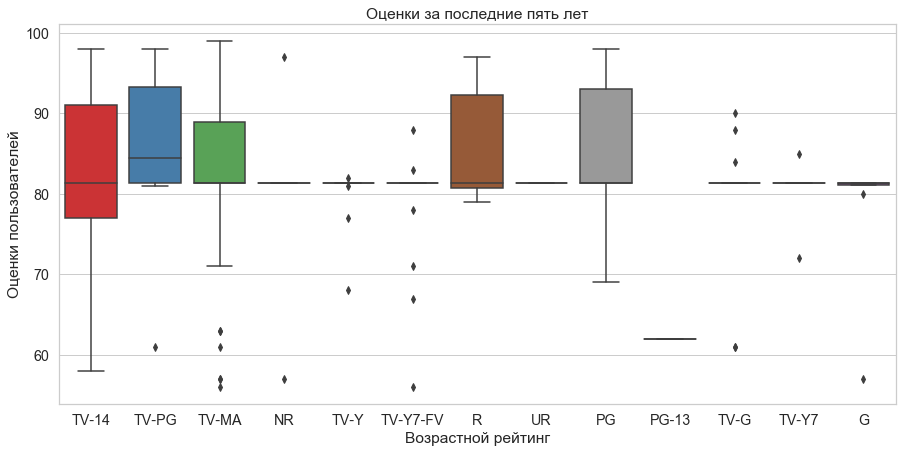

In [271]:
plt.figure(figsize=(15, 7))
plt.subplot()
sns.boxplot(x = 'rating', 
            y = 'user rating score',
            data = data.loc[data['release year'] >= 2013],
            palette = 'Set1').set(
            xlabel='Возрастной рейтинг',
            ylabel='Оценки пользователей')
plt.title('Оценки за последние пять лет')
plt.show()

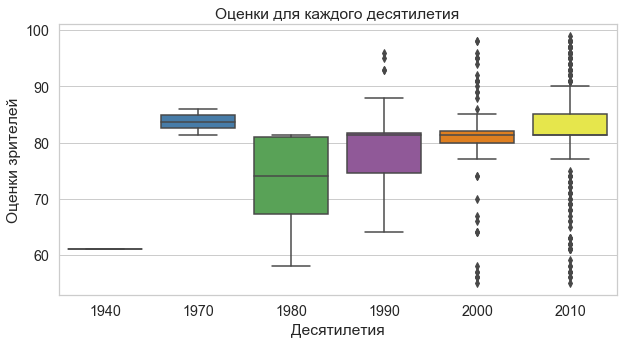

In [272]:
plt.figure(figsize=(10, 5)) 
sns.boxplot( 
x=data['release year']//10*10,
y=data['user rating score'],
palette='Set1' 
).set( 
xlabel='Десятилетия', 
ylabel='Оценки зрителей' 
) 
plt.title('Оценки для каждого десятилетия')
plt.show();

**Вывод:** В целом мы видим рост оценок с каждым десятилетием. Возможно, это говорит о том, что шоу становились лучше.

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [279]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [280]:
merged = pd.merge(category, df_yt,
        left_on='id', right_on='category_id', how = 'inner')
merged.head(20)

,id,name,trending_date,category_id,views,likes,dislikes,comment_count
0,1,Film & Animation,14,1,23316,699,160,217
1,1,Film & Animation,14,1,101402,6304,249,863
2,1,Film & Animation,14,1,55554,52,7,69
3,1,Film & Animation,14,1,44339,3038,499,361
4,1,Film & Animation,14,1,54031,227,35,72
5,1,Film & Animation,14,1,56884,751,78,77
6,1,Film & Animation,14,1,30142,25,91,17
7,1,Film & Animation,14,1,22000,78,11,10
8,1,Film & Animation,14,1,14294,471,30,126
9,1,Film & Animation,14,1,50269,4229,150,398


Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [281]:
pivot_table = pd.pivot_table(merged, 
              index= 'name',
              columns='trending_date',
              values= 'views',
              aggfunc = np.sum)
pivot_table

trending_date,14,15,16,17,18,19,20,21
name,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0


Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

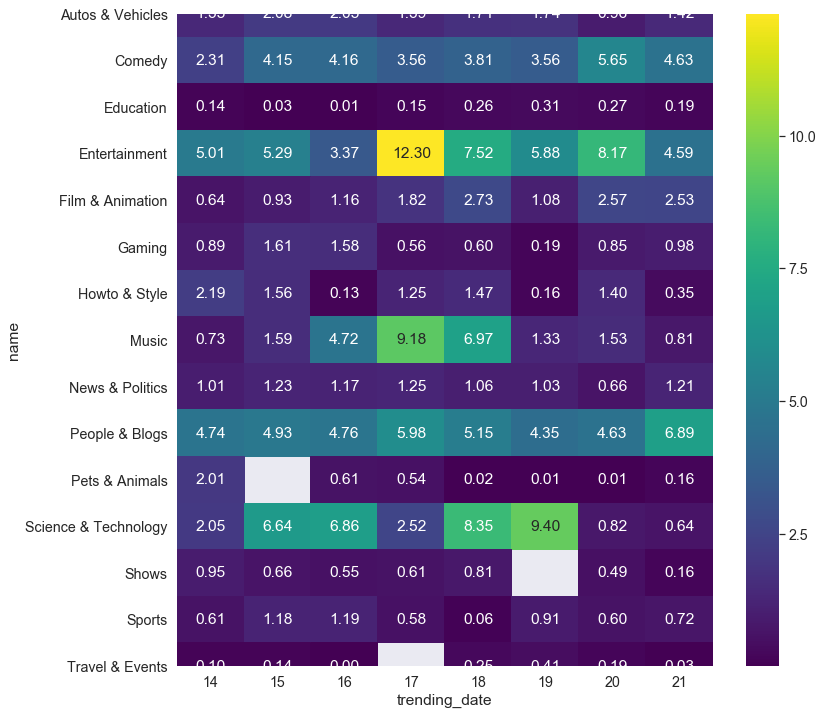

In [282]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(pivot_table/10**6, annot=True, fmt = '.2f', ax=ax, cmap="viridis")
plt.show()

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [283]:
pivot_table = pd.pivot_table(merged, 
              index= 'name',
              columns='trending_date',
              values= 'views',
              aggfunc = np.sum,
              margins=True,
              margins_name='Всего просмотров')
pivot_table

trending_date,14,15,16,17,18,19,20,21,Всего просмотров
name,,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0,12699222
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0,31814553
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0,1346879
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0,52130273
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0,13457229
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0,7262095
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0,8511357
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0,26858213
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0,8616728


В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

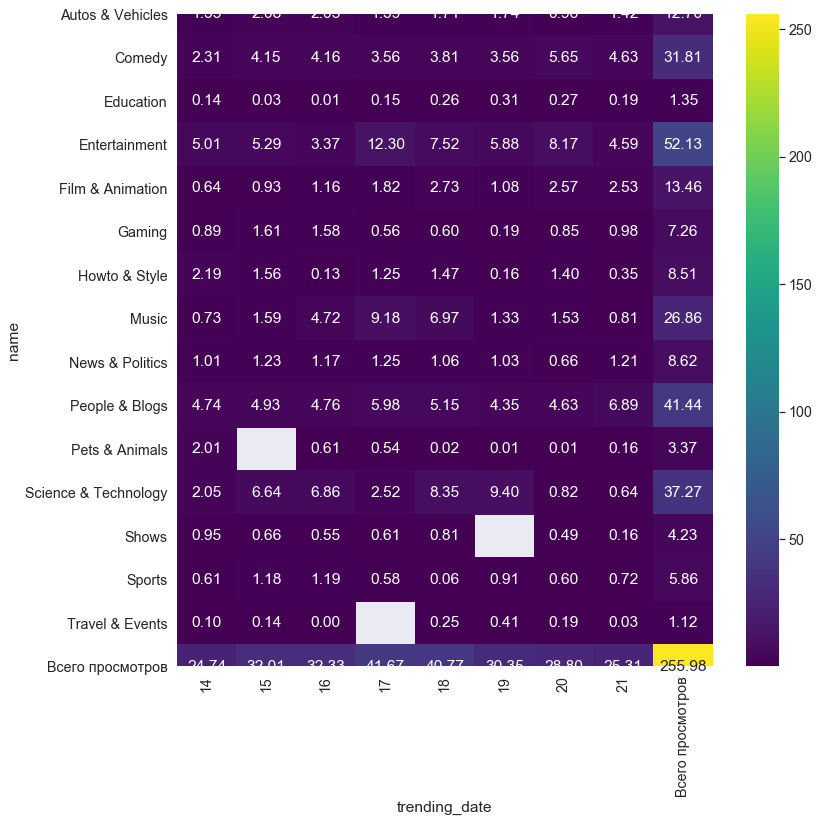

In [284]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(pivot_table/10**6, annot=True, fmt = '.2f', ax=ax, cmap="viridis")
plt.show()

**Вывод:** Проблема таблиц выше в том, что визуально большие числа плохо осваиваются сходу, поскольку нельзя глазом быстро оценить даже порядок, а вот, нормировав, информация становится читабельной. Кстати, исходя из полученных данных, видно, что народ больше смотрит видео категории развлечений.

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

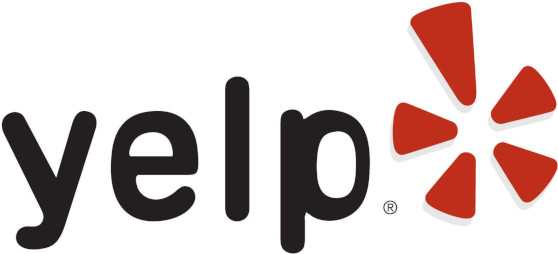

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [285]:
data = pd.read_csv('yelp_business.csv')
del data['Unnamed: 0']
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [286]:
top_cities = data.loc[:, ['city', 'state','name']].groupby(['city', 'state']).count()
top_cities = top_cities.rename(columns = {'name' : 'count'})
top_cities = top_cities.sort_values(by='count', ascending=False)
top_cities.head()

,,count
city,state,
Las Vegas,NV,26764
Phoenix,AZ,17213
Toronto,ON,17205
Charlotte,NC,8553
Scottsdale,AZ,8227


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

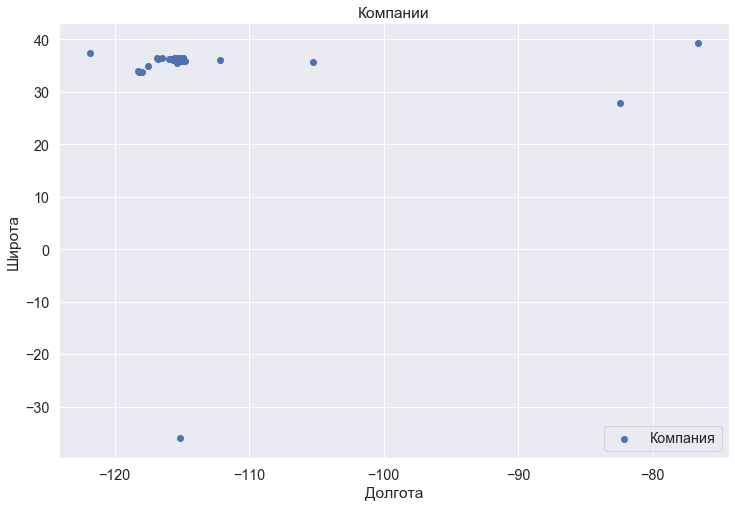

In [287]:
#Выяснили, что N - это Las Vegas
LV_companies = data.loc[data['city'] == 'Las Vegas']

plt.figure(figsize=(12,8))
plt.scatter(LV_companies.longitude,
            LV_companies.latitude,
            label = 'Компания')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Компании')
plt.legend()
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

Загуглил координаты LV: (-115.17, 36.11)

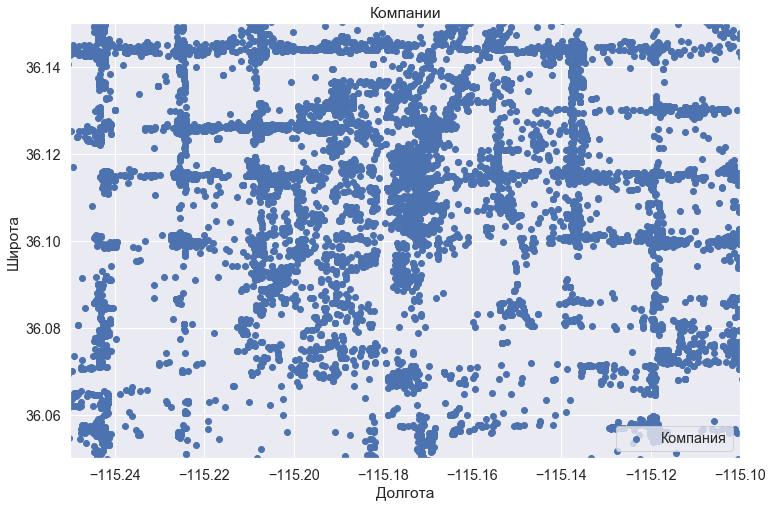

In [301]:
plt.figure(figsize=(12,8))
plt.scatter(LV_companies.longitude,
            LV_companies.latitude,
            label = 'Компания')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Компании')
plt.xlim(-115.25,-115.1)
plt.ylim(36.05,36.15)
plt.legend()
plt.show()

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [302]:
review = pd.read_csv('yelp_review.csv')
del review['Unnamed: 0']
review

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...
5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [303]:
review = review.set_index('business_id')
LV_review = review.loc[LV_companies.business_id]
review = review.reset_index()
LV_review

,stars
business_id,
kCoE3jvEtg6UVz5SOD3GVw,4
kCoE3jvEtg6UVz5SOD3GVw,1
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
...,...
9ouC6BpmjFpLfHeQnLQqng,5
9ouC6BpmjFpLfHeQnLQqng,5
n9a-3YhibkMDUEgncIivHg,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [304]:
LV_scores = LV_review.groupby('business_id').aggregate([np.mean, np.size])
LV_scores

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     4
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6
zzzaIBwimxVej4tY6qFOUQ  3.432432    37

[26775 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [305]:
LV_scores.columns=['Average rating', 'Reviews']
LV_scores.head()

,Average rating,Reviews
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [306]:
LV_companies.set_index('business_id')
LV_companies.index

Int64Index([     6,      7,     26,     41,     48,     49,     52,     53,
                54,     59,
            ...
            174452, 174455, 174469, 174474, 174526, 174539, 174545, 174546,
            174552, 174556],
           dtype='int64', length=26775)

In [307]:
LV_scores

,Average rating,Reviews
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


In [308]:
LV_joined = LV_companies.join(LV_scores, on = 'business_id')
LV_joined

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,Average rating,Reviews
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...,4.000000,5
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods,1.444444,9
26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174539,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Westside,"""3030 S Jones Blvd, Ste 105""",Las Vegas,NV,89146,36.134355,-115.224462,1,Real Estate Services;Home Services;Property Ma...,4.466667,15
174545,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NaN,"""591 N Eastern Ave, Ste 110""",Las Vegas,NV,89101,36.173589,-115.116779,1,Coffee & Tea;Food,2.400000,35
174546,sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",Southwest,"""7325 S Rainbow Blvd, Ste 120""",Las Vegas,NV,89139,36.055130,-115.243488,1,Mobile Phone Accessories;Mobile Phones;Electro...,3.857143,35
174552,9ouC6BpmjFpLfHeQnLQqng,"""9 Dragons Fight Shop""",Westside,"""3375 S Decatur Blvd, Ste 7""",Las Vegas,NV,89102,36.128780,-115.208990,1,Martial Arts;Sports Wear;Men's Clothing;Sporti...,5.000000,5


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [309]:
###

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [310]:
rounded_latitude = np.round(LV_joined.latitude*4, decimals=1) * 0.25
rounded_longitude = np.round(LV_joined.longitude*4, decimals=1) * 0.25

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

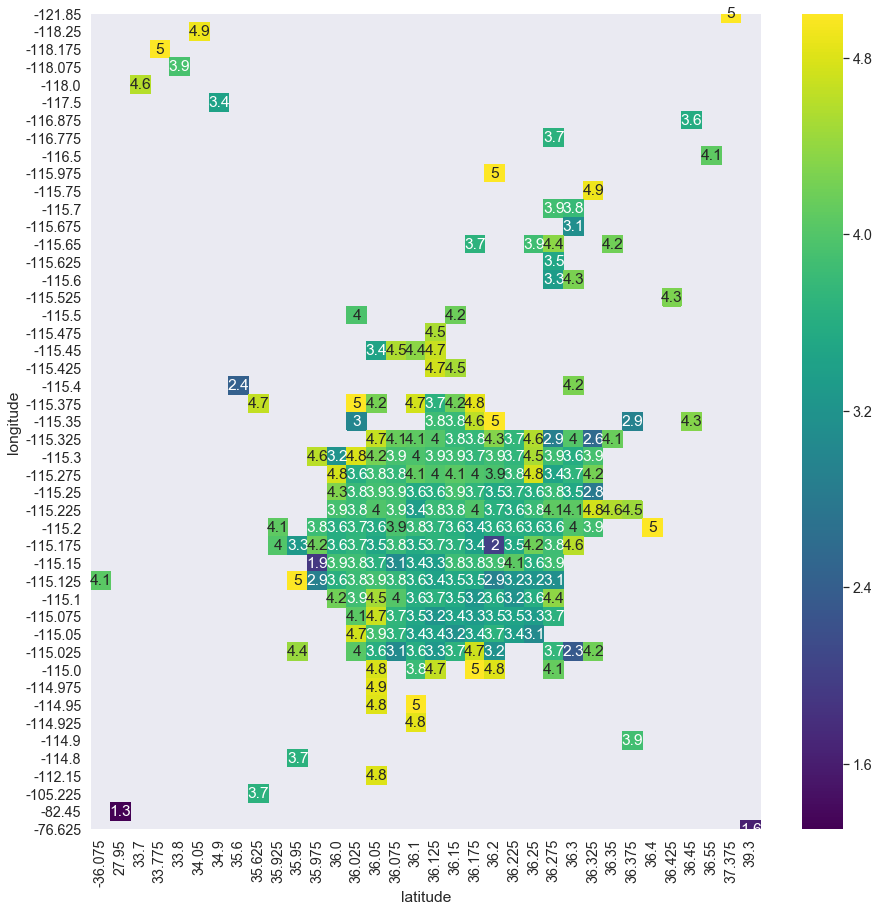

In [311]:
pivot_table = pd.pivot_table(LV_joined,
                   values = 'Average rating',
                   index = rounded_longitude,
                   columns= rounded_latitude,
                   aggfunc= np.mean)

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pivot_table, annot=True, ax=ax, cmap="viridis")
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Во-первых, когда данных по району мало, можно сделать ложный вывод о качестве мест. А вдруг просто единично совпало, что есть ужасное/хорошее место? Во-вторых, так как диапозон относительно большой, на графике, вы не заметите разницу между 3.0 и 3.5 (и тому подобное). 

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

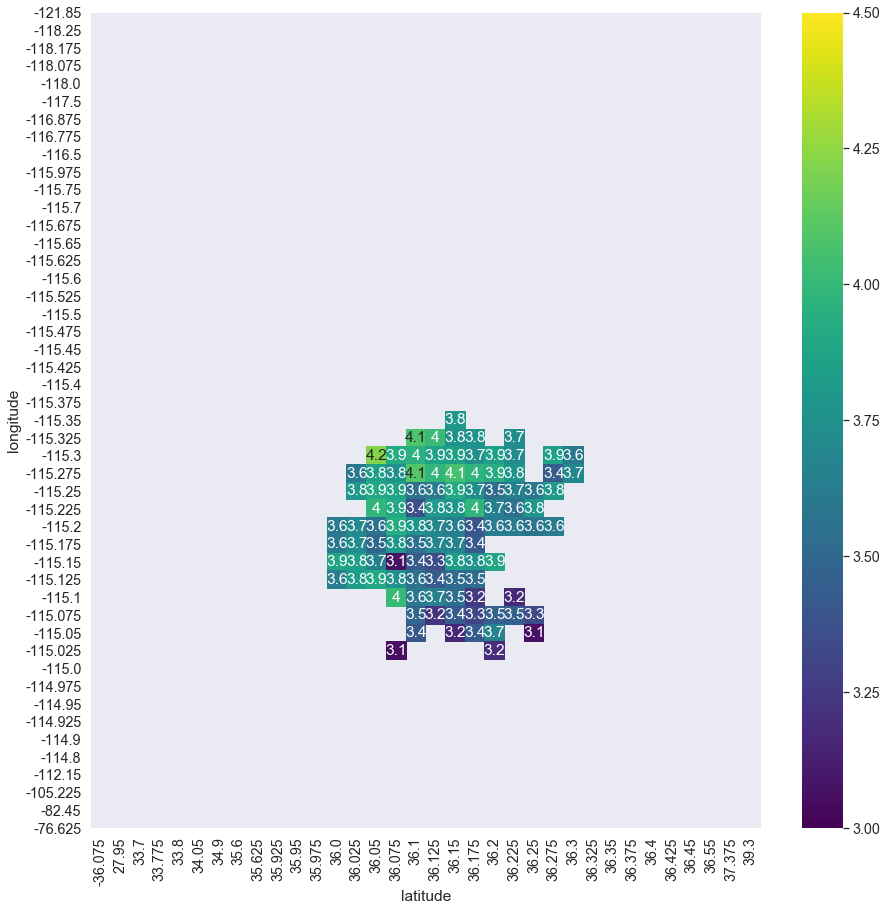

In [312]:
mask = pd.pivot_table(LV_joined,
                   values = 'Average rating',
                   index = rounded_longitude,
                   columns= rounded_latitude,
                   aggfunc= 'count') < 30
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pivot_table, annot=True, ax=ax, cmap="viridis", mask =mask, vmin=3.0, vmax=4.5)
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Ну вот, другое дело! Сейчас, во-первых, данным можно доверять из-за количества отзывов. Во-вторых, наглядно видны отличия районов.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [213]:
def check_if_restaurant(string):
    string = string.lower() 
    return 'restaurant' in string
LV_joined['restaurant'] = LV_joined.categories.apply(check_if_restaurant)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,restaurant,Average rating,Reviews
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...,False,4.000000,5
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods,False,1.444444,9
26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services,False,4.739130,23
41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...,False,4.450000,20
48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping,False,3.680000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174539,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Westside,"""3030 S Jones Blvd, Ste 105""",Las Vegas,NV,89146,36.134355,-115.224462,1,Real Estate Services;Home Services;Property Ma...,False,4.466667,15
174545,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NaN,"""591 N Eastern Ave, Ste 110""",Las Vegas,NV,89101,36.173589,-115.116779,1,Coffee & Tea;Food,False,2.400000,35
174546,sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",Southwest,"""7325 S Rainbow Blvd, Ste 120""",Las Vegas,NV,89139,36.055130,-115.243488,1,Mobile Phone Accessories;Mobile Phones;Electro...,False,3.857143,35
174552,9ouC6BpmjFpLfHeQnLQqng,"""9 Dragons Fight Shop""",Westside,"""3375 S Decatur Blvd, Ste 7""",Las Vegas,NV,89102,36.128780,-115.208990,1,Martial Arts;Sports Wear;Men's Clothing;Sporti...,False,5.000000,5


In [216]:
ans = LV_joined.loc[LV_joined.restaurant == True]
ans = ans.loc[ans.Reviews >= 5]
ans

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,restaurant,Average rating,Reviews
52,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,1,Nightlife;Bars;Barbeque;Sports Bars;American (...,True,3.769231,13
53,4srfPk1s8nlm1YusyDUbjg,"""Subway""",Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.064652,-115.118954,1,Fast Food;Restaurants;Sandwiches,True,2.666667,6
54,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,1,Arcades;Arts & Entertainment;Gastropubs;Restau...,True,3.117479,349
122,Wpt0sFHcPtV5MO9He7yMKQ,"""McDonald's""",Eastside,"""3020 E Desert Inn Rd""",Las Vegas,NV,89121,36.130013,-115.109310,1,Restaurants;Fast Food;Burgers,True,2.150000,20
133,W1Yr6c2XDx_RBjb6WsV-aQ,"""Divine Cafe at the Springs Preserve""",Westside,"""333 S Valley View Blvd""",Las Vegas,NV,89152,36.170706,-115.190288,1,Restaurants;Cafes;American (New);Bars;Nightlif...,True,4.050000,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174415,Kbbm6Vd5UdbP10dwjBghRw,"""In-N-Out Burger""",Southwest,"""3882 Blue Diamond Rd""",Las Vegas,NV,89139,36.040628,-115.191256,1,Restaurants;Fast Food;Burgers,True,4.196078,255
174427,UpW3jyJ3_kTG7oDSflwnMA,"""Archi's Thai Kitchen""",NaN,"""6360 W Flamingo Rd""",Las Vegas,NV,89103,36.114816,-115.230970,1,Restaurants;Thai,True,3.994695,377
174451,e2ApirIzYID9xIye0r_gKQ,"""Farmer Boys""",Centennial,"""7791 W Tropical Pkwy""",Las Vegas,NV,89149,36.271006,-115.264392,1,Salad;Breakfast & Brunch;Sandwiches;Burgers;Re...,True,2.735955,178
174455,Fv4EXwV30rwGD2NzN1ekgA,"""Gorilla Sushi""",Eastside,"""1801 E Tropicana Ave, Ste 2""",Las Vegas,NV,89119,36.100067,-115.127347,1,Asian Fusion;Restaurants;Japanese;Sushi Bars,True,4.424490,245


Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Потому что если отзывов мало, то можно сделать ложный вывод о качестве ресторана/района. Вдруг просто кто-то единственный поставил отзыв, будучи недовольным, и сейчас из-за него ресторан "считается" худшим?

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [313]:
best_restaurants = ans.loc[ans.Reviews >= 50].sort_values(by='Average rating', ascending=False)
top10_restaurants = best_restaurants.loc[:,['name', 'Average rating', 'Reviews', 'latitude', 'longitude', 'categories']].head(10)
top10_restaurants

,name,Average rating,Reviews,latitude,longitude,categories
22863,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
165971,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
109391,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
167803,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
13577,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
124895,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
78897,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
78362,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
34418,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...
154726,"""California Sushi Burrito""",4.807018,57,36.125636,-115.202487,Asian Fusion;Fast Food;Restaurants;Japanese;Po...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [314]:
###

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** кот Василий правильно делает, что ставит ограничение на количество отзывов по вышесказанным причинам. А вообще вся задача показывает, насколько важно ставить ограничение снизу по количеству данных, чтобы можно было надежно опираться на них.